In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Notes:

## I had trouble running the entire csv file. Below, you will note essentially 3 different regions: 
*   Random
*   Exclude
*   Include


## The 1st region/cell was successfully implemented and for the sake of the initial analysis, it will be used to create a clean csv file.



 I was trying to play with the code and how to get around the hurdle of importing a large file.

I left the code cells in here just for reference of old work in case we want to refer back to the code or if it can run on a different computer other than mine :( 

In [ ]:
#RANDOM
import pandas as pd
import random

# problem with big data - memory within colab too small to load all data - see the RAM use 

# Set the desired number of randomly selected rows
n = 1000000
# Read a large CSV file into chunks
filename = "/content/drive/MyDrive/DA LAB/PartTable.csv"
total_rows = sum(1 for _ in open(filename))
chunk_size = 100000  # number of rows to load at a time
skip_rows = total_rows - n  # Number of rows to skip
chunks = []

for chunk in pd.read_csv(filename, chunksize=chunk_size):# store large file in chunks and randomly select rows to include
    # Randomly select rows
    sampled_chunk = chunk.sample(n=min(chunk_size, n), random_state=42)
    # Append the sampled chunk to the list
    chunks.append(sampled_chunk)
    # Update the remaining number of rows to sample
    n -= len(sampled_chunk)
    if n <= 0:
        break

# Concatenate into a single DataFrame
df = pd.concat(chunks)
# Display
print(df)


In [1]:
#EXCLUDE

#STILL TOO BIG TO RUN OTHER CODE LINES
import pandas as pd
chunk_size = 10000  #Define the chunk size (number of rows to load at a time)
chunks = []   # Initialize an empty list to store the chunks
exclude_columns = ['cRequired','cNested','ixMaterial']# Define the columns to exclude
for chunk in pd.read_csv("/content/drive/MyDrive/DA LAB/PartTable.csv", chunksize=chunk_size, usecols=lambda column: column not in exclude_columns):# Iterate over the file in chunks
    processed_chunk = chunk  # Placeholder, replace with your processing logic
    chunks.append(processed_chunk)# Append the processed chunk to the list

# Concatenate all the processed chunks into a single DataFrame
processed_data = pd.concat(chunks)

In [1]:
#INCLUDE pt1


import pandas as pd
chunk_size = 10000  #Define the chunk size (number of rows to load at a time)
chunks = []   # Initialize an empty list to store the chunks
include_columns = ['cRequired','cNested']# Define the columns to exclude

for chunk in pd.read_csv("/content/drive/MyDrive/DA LAB/PartTable.csv", chunksize=chunk_size, usecols=include_columns):# Iterate over the file in chunks
    processed_chunk = chunk  # Placeholder, replace with your processing logic
    chunks.append(processed_chunk)# Append the processed chunk to the list

# Concatenate all the processed chunks into a single DataFrame
processed_data = pd.concat(chunks)

In [ ]:
#INCLUDE pt2



import pandas as pd
#Identifying which rows are a mismatch
diff_rows=processed_data[processed_data['cRequired']!=processed_data['cNested']]
summary_stats = diff_rows.describe()
print(summary_stats)

#Amount of mismatches
count_diffrows=(processed_data['cRequired']!=processed_data['cNested']).sum()
print("Amount of different rows:", count_diffrows)

#Magnitude of mismatch
difference=processed_data['cRequired']-processed_data['cNested']
difference_df=pd.DataFrame({'Difference': difference})
print("Here are the summary stats of the differences")
summary_stats_difference = difference.describe()
print(summary_stats_difference)

In [ ]:
#INCLUDE pt3


import pandas as pd

same_rows=processed_data[processed_data['cRequired']==processed_data['cNested']]
count_samerows=(processed_data['cRequired']==processed_data['cNested']).sum()
print("Amount of same rows:", count_samerows)

summary_stats_1 = same_rows.describe()
print(summary_stats_1)

# WILL USE SAMPLE DATA (1 MILLION ROWS) MOVING FORWARD IN THIS CODE::: 



DECIDED TO USE ASHAUNTE'S CODE AS A FOUNDATION!

In [27]:
#run this cell after running the RANDOM cell

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define the list of variables to analyze
variables = df.columns.tolist()
# Remove the non-numeric variables
non_numeric = ['cBlock', 'cCycle', 'cPlot', 'cEntry', 'cTreatment', 'cRep']
numeric_variables = [var for var in variables if var not in non_numeric]

# Create a file to write the analysis and output
output_file = open('analysis_output.txt', 'w')

# Loop through each numeric variable and perform exploratory and univariate analysis
for var in numeric_variables:
    # Convert the column to numeric data type (if not already numeric)
    df[var] = pd.to_numeric(df[var], errors='coerce')

    # Calculate the IQR and define the threshold values
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    threshold_low = Q1 - 1.5 * IQR
    threshold_high = Q3 + 1.5 * IQR

    # Create a new DataFrame with the outlier values removed
    df_no_outliers = df[(df[var] >= threshold_low) & (df[var] <= threshold_high)]

    # Perform exploratory analysis
    output_file.write(f"Exploratory Analysis for {var}:\n")
    output_file.write("-------------------------------\n")
    output_file.write(f"Number of observations: {df_no_outliers.shape[0]}\n")
    output_file.write(f"Mean: {df_no_outliers[var].mean()}\n")
    output_file.write(f"Standard Deviation: {df_no_outliers[var].std()}\n")
    output_file.write(f"Minimum: {df_no_outliers[var].min()}\n")
    output_file.write(f"25th Percentile: {df_no_outliers[var].quantile(0.25)}\n")
    output_file.write(f"Median: {df_no_outliers[var].median()}\n")
    output_file.write(f"75th Percentile: {df_no_outliers[var].quantile(0.75)}\n")
    output_file.write(f"Maximum: {df_no_outliers[var].max()}\n\n")


# Close the output file
output_file.close()
# Define the file path
file_path = '/content/drive/MyDrive/DA LAB/CLEANPartTable.csv'
# Write the cleaned data to a new CSV file
df_no_outliers.to_csv(file_path, index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Very rough draft. ignore the code below

stop

stop

stop

stop

In [ ]:
import pandas as pd

# Select the variable of interest
selected_var = 'dCropUtil'

# Compute the correlation coefficients between the selected variable and all other variables
corr_values = df.corr()[selected_var]

# Display the correlation coefficients
print(corr_values)

In [ ]:
df.dCropUtil.describe()

In [ ]:
df.dCropUtil.max()

In [ ]:
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv('NestTable.csv')

# Select the variable of interest
selected_var = 'dCropUtil'

# Calculate the IQR and define the threshold values
Q1 = df['dCropUtil'].quantile(0.25)
Q3 = df['dCropUtil'].quantile(0.75)
IQR = Q3 - Q1
threshold_low = Q1 - 1.5 * IQR
threshold_high = Q3 + 1.5 * IQR

# Create a new DataFrame with the outlier values removed
df_no_outliers = df[(df['dCropUtil'] >= threshold_low) & (df['dCropUtil'] <= threshold_high)]

# Compute the correlation coefficients between the selected variable and all other variables in the new DataFrame
corr_values_no_outliers = df_no_outliers.corr()['dCropUtil']

# Display the correlation coefficients
print(corr_values_no_outliers)
mean_no_outliers = df_no_outliers['cParts'].mean()
print(mean_no_outliers)


In [ ]:
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv('NestTable.csv')

# Define the outlier detection function using the IQR method
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    threshold_low = Q1 - 1.5 * IQR
    threshold_high = Q3 + 1.5 * IQR
    return df[(df[column] >= threshold_low) & (df[column] <= threshold_high)]

# Remove outliers from all columns in the DataFrame
for column in df.columns:
    df = remove_outliers_iqr(df, column)

# Compute the correlation coefficients between all pairs of variables
corr_values = df.corr()

# Display the correlation coefficients
print(corr_values)

# Compute the means of all variables
means = df.mean()

# Display the means
print(means)


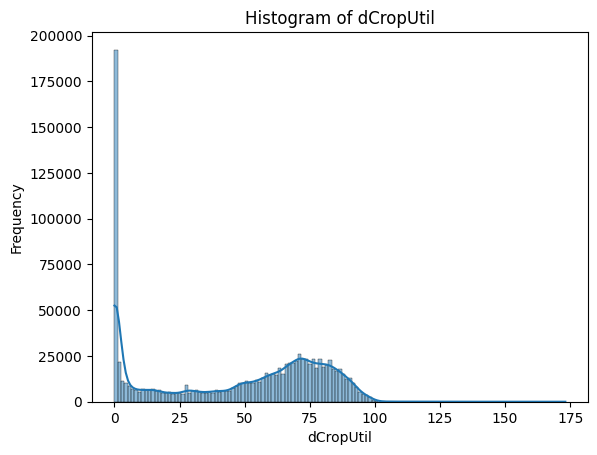

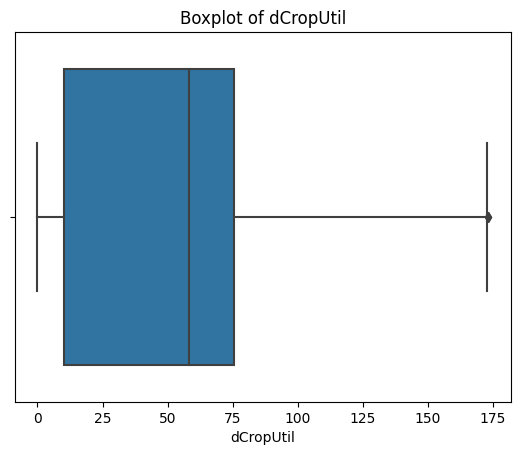

count    1.048168e+06
mean     4.761247e+01
std      3.266428e+01
min      0.000000e+00
25%      1.010667e+01
50%      5.816720e+01
75%      7.531650e+01
max      1.731576e+02
Name: dCropUtil, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a DataFrame
df = pd.read_csv('NestTable.csv')

# Select the variable of interest
selected_var = 'dCropUtil'

# Calculate the IQR and define the threshold values
Q1 = df[selected_var].quantile(0.25)
Q3 = df[selected_var].quantile(0.75)
IQR = Q3 - Q1
threshold_low = Q1 - 1.5 * IQR
threshold_high = Q3 + 1.5 * IQR

# Create a new DataFrame with the outlier values removed
df_no_outliers = df[(df[selected_var] >= threshold_low) & (df[selected_var] <= threshold_high)]

# Plot a histogram of the selected variable
sns.histplot(data=df_no_outliers, x=selected_var, kde=True)
plt.title('Histogram of {}'.format(selected_var))
plt.xlabel(selected_var)
plt.ylabel('Frequency')
plt.show()

# Plot a boxplot of the selected variable
sns.boxplot(data=df_no_outliers, x=selected_var)
plt.title('Boxplot of {}'.format(selected_var))
plt.xlabel(selected_var)
plt.show()

# Compute the summary statistics of the selected variable
summary = df_no_outliers[selected_var].describe()
print(summary)


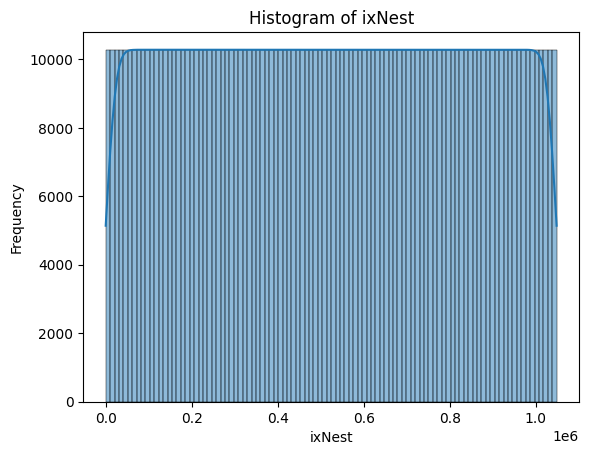

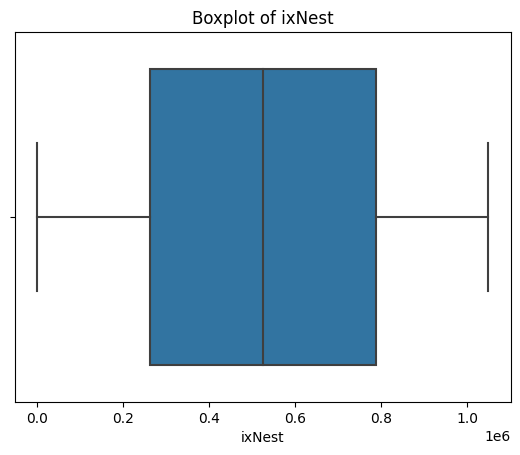

count    1.048575e+06
mean     5.242880e+05
std      3.026977e+05
min      1.000000e+00
25%      2.621445e+05
50%      5.242880e+05
75%      7.864315e+05
max      1.048575e+06
Name: ixNest, dtype: float64


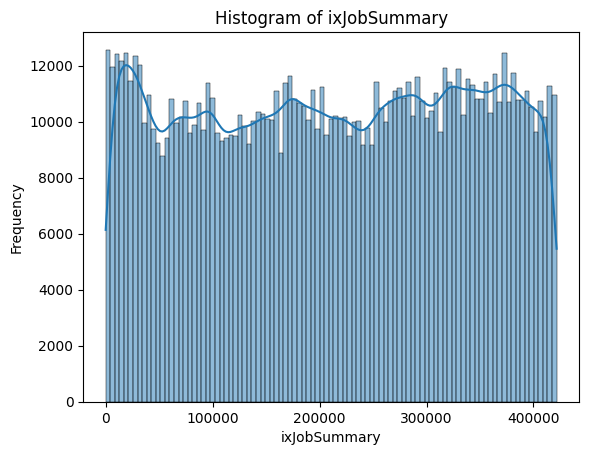

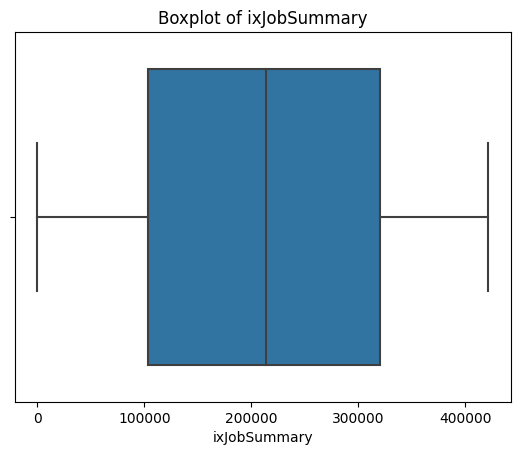

count    1.048575e+06
mean     2.118896e+05
std      1.234762e+05
min      1.000000e+00
25%      1.035690e+05
50%      2.134040e+05
75%      3.203100e+05
max      4.216350e+05
Name: ixJobSummary, dtype: float64


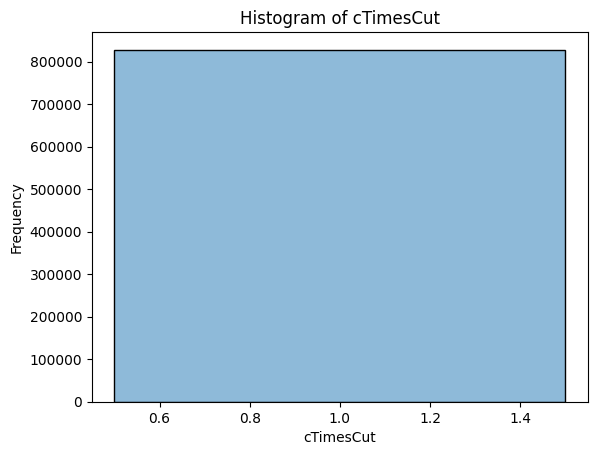

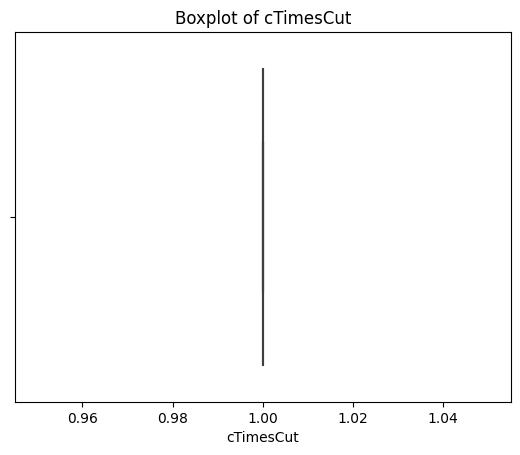

count    828180.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: cTimesCut, dtype: float64


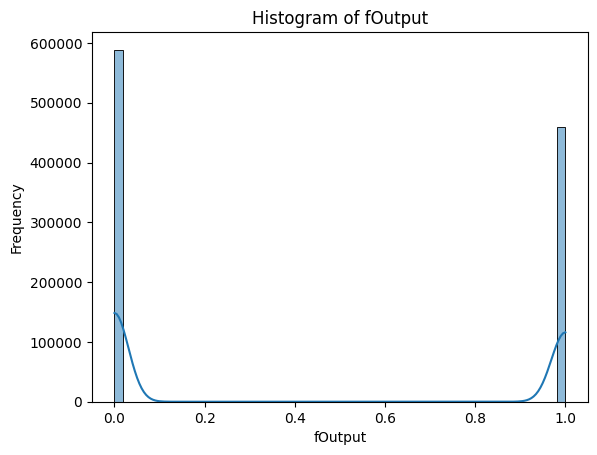

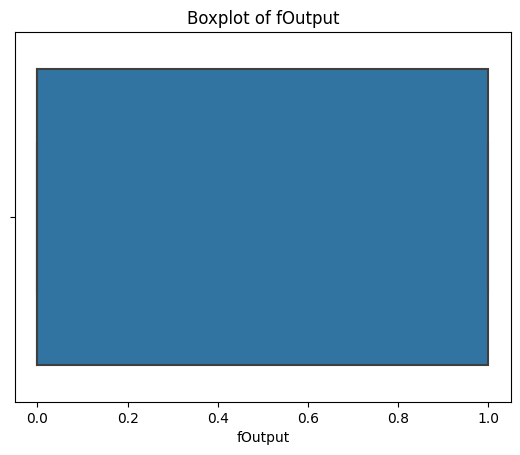

count    1.048575e+06
mean     4.386792e-01
std      4.962257e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.000000e+00
Name: fOutput, dtype: float64


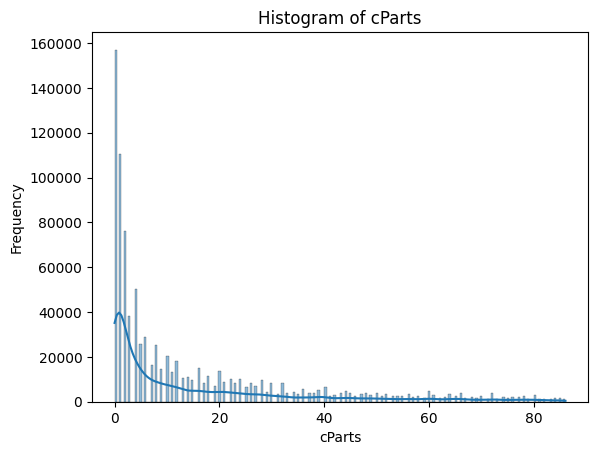

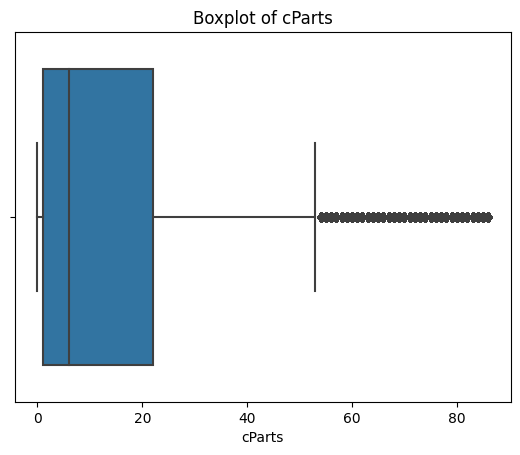

count    929443.000000
mean         15.249018
std          20.222780
min           0.000000
25%           1.000000
50%           6.000000
75%          22.000000
max          86.000000
Name: cParts, dtype: float64


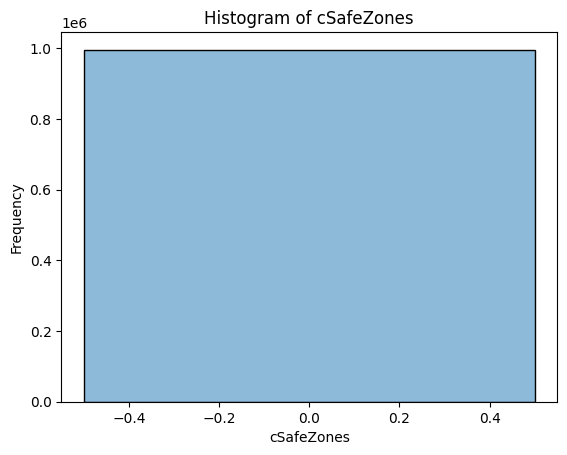

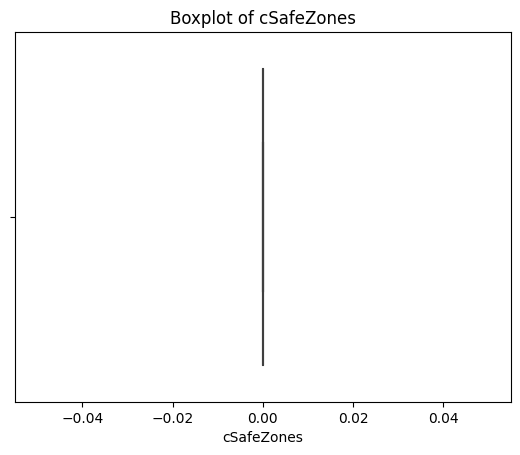

count    995989.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: cSafeZones, dtype: float64


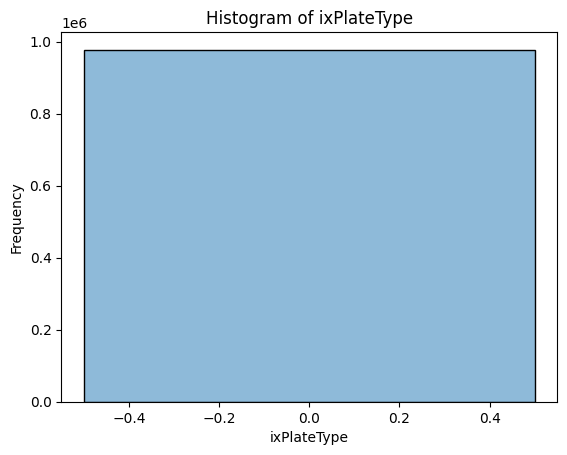

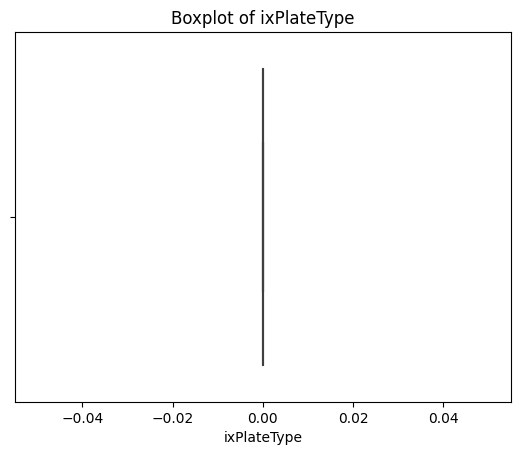

count    977286.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: ixPlateType, dtype: float64


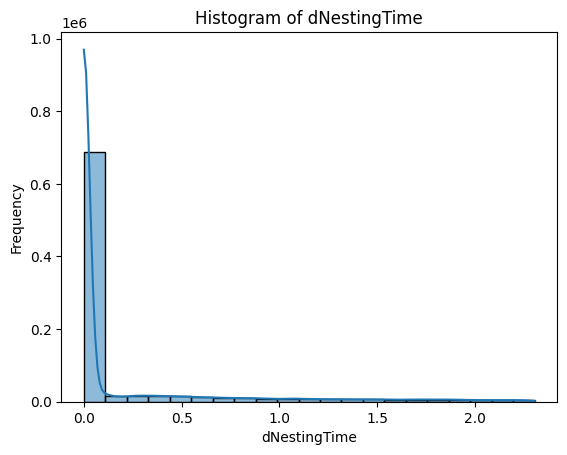

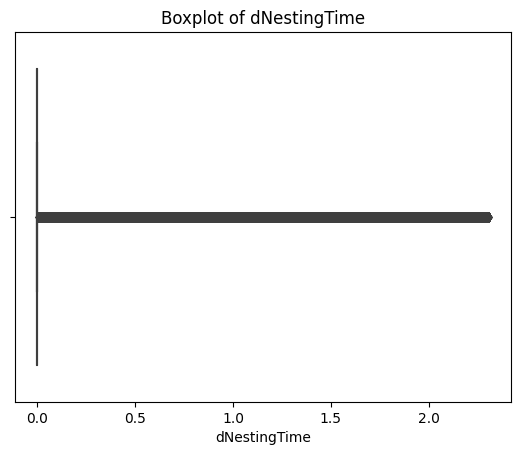

count    862492.000000
mean          0.191419
std           0.465011
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           2.305000
Name: dNestingTime, dtype: float64


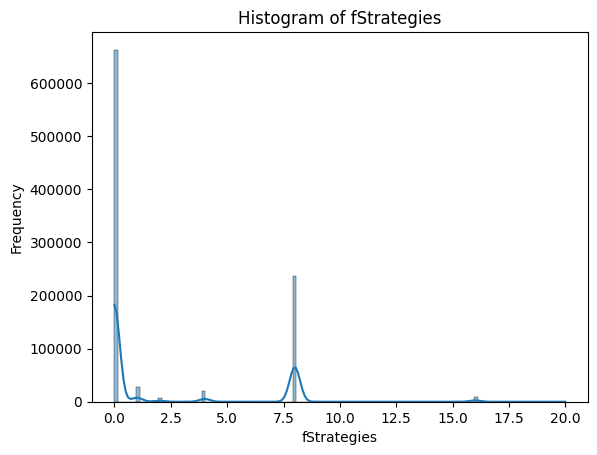

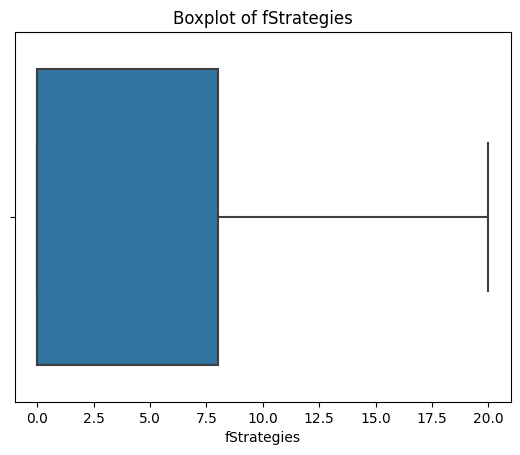

count    961820.000000
mean          2.239727
std           3.671855
min           0.000000
25%           0.000000
50%           0.000000
75%           8.000000
max          20.000000
Name: fStrategies, dtype: float64


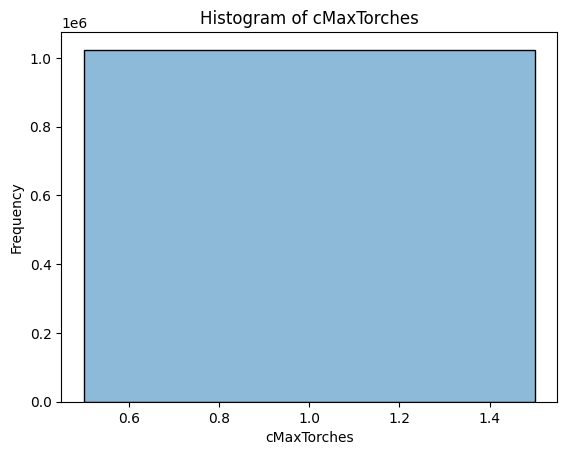

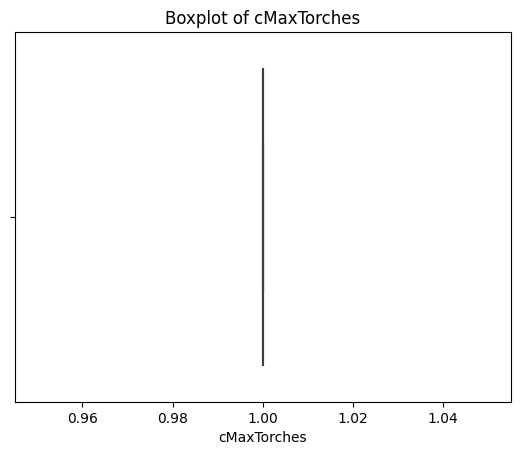

count    1023507.0
mean           1.0
std            0.0
min            1.0
25%            1.0
50%            1.0
75%            1.0
max            1.0
Name: cMaxTorches, dtype: float64


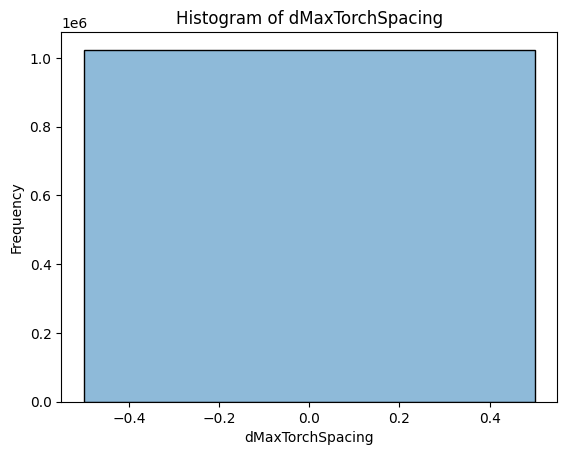

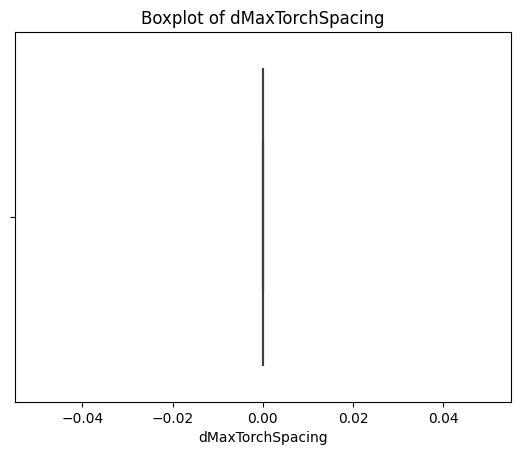

count    1023507.0
mean           0.0
std            0.0
min            0.0
25%            0.0
50%            0.0
75%            0.0
max            0.0
Name: dMaxTorchSpacing, dtype: float64


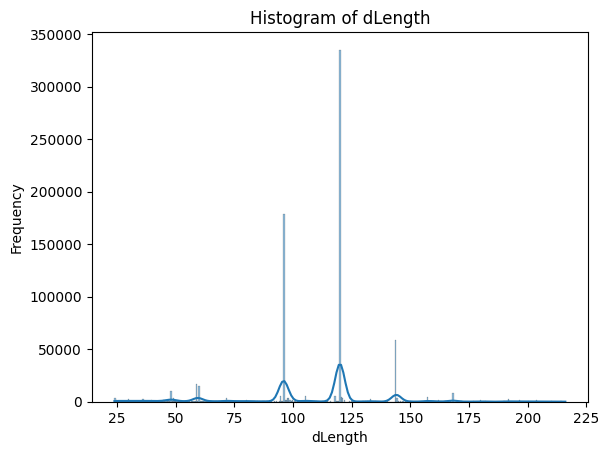

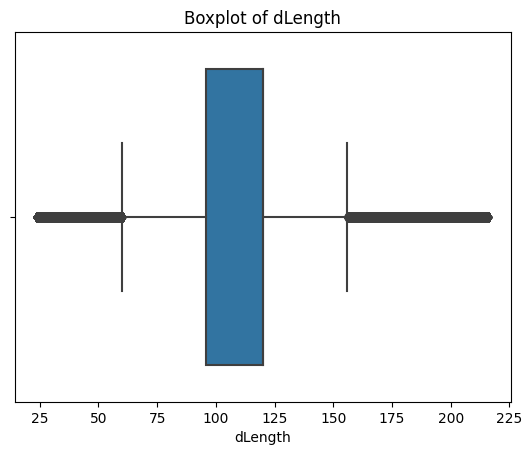

count    795124.000000
mean        108.040066
std          30.164668
min          24.000000
25%          96.000000
50%         120.000000
75%         120.000000
max         216.000000
Name: dLength, dtype: float64


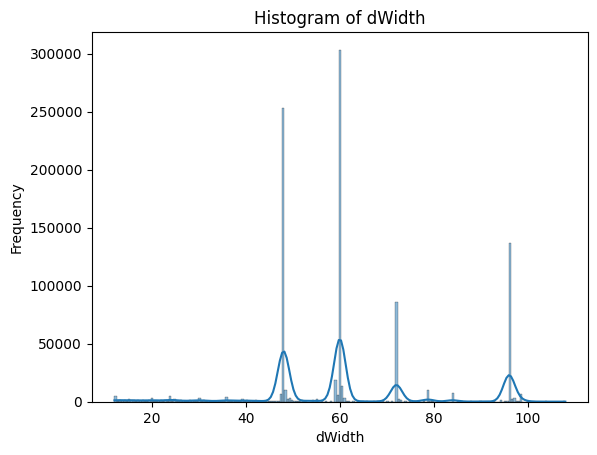

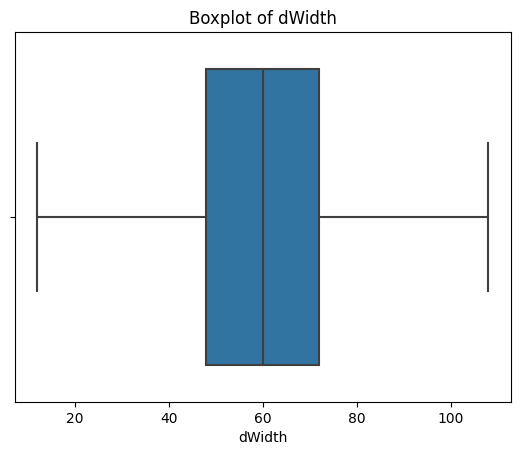

count    984605.000000
mean         61.370562
std          19.061730
min          12.000000
25%          48.000000
50%          60.000000
75%          72.000000
max         108.000000
Name: dWidth, dtype: float64


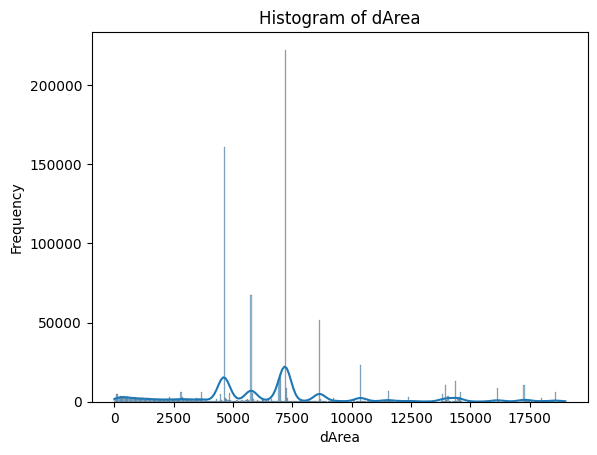

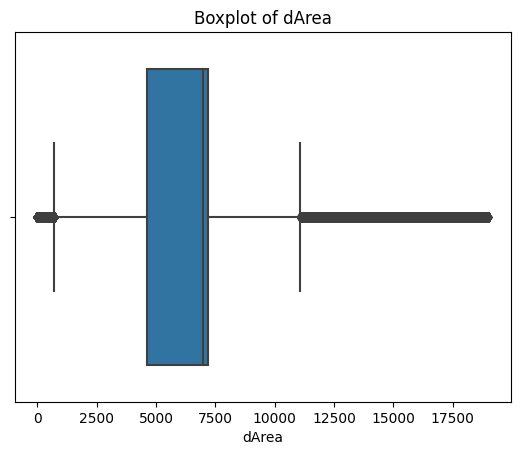

count    901404.000000
mean       6803.182828
std        3828.108650
min           0.000000
25%        4608.000000
50%        6975.013900
75%        7200.000000
max       19008.000000
Name: dArea, dtype: float64


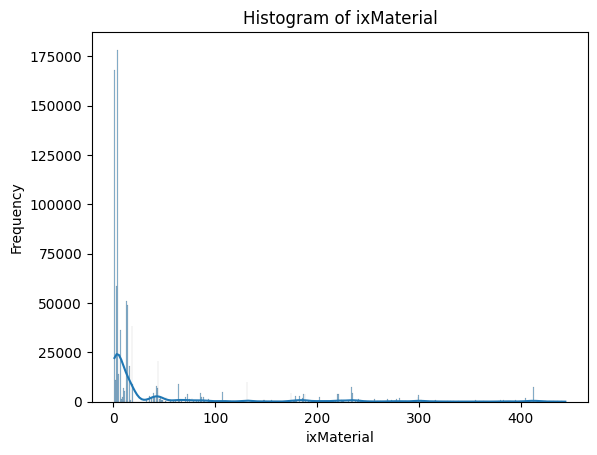

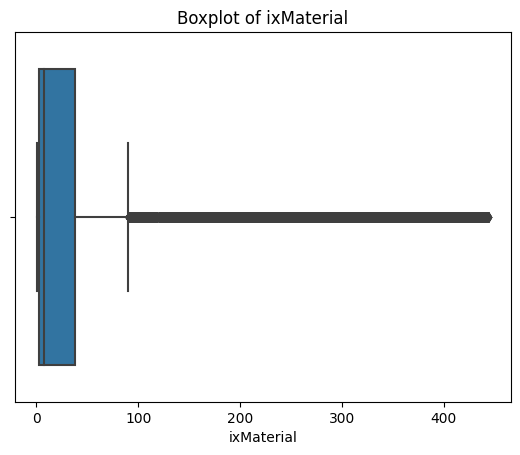

count    880419.000000
mean         45.618576
std          89.016073
min           1.000000
25%           3.000000
50%           7.000000
75%          38.000000
max         444.000000
Name: ixMaterial, dtype: float64


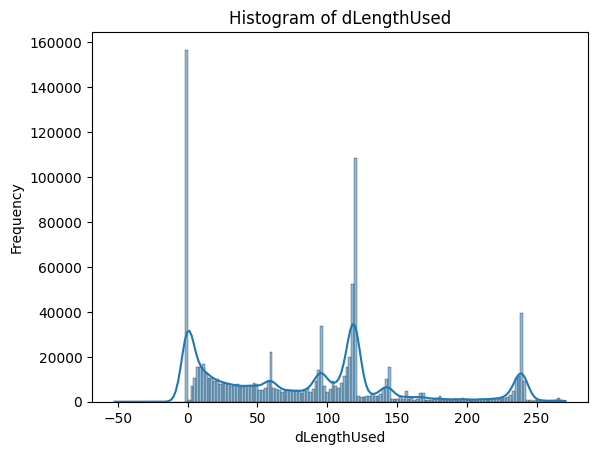

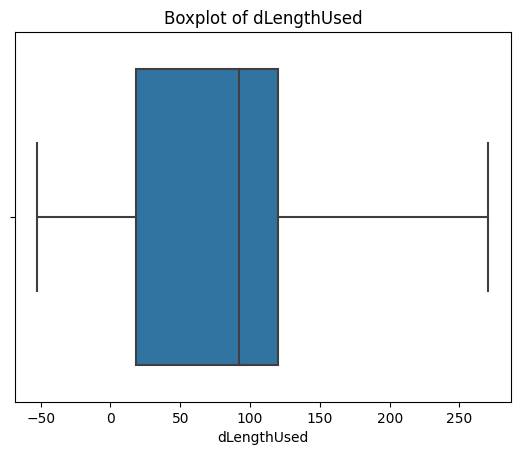

count    1.021417e+06
mean     8.645019e+01
std      7.136594e+01
min     -5.232920e+01
25%      1.805700e+01
50%      9.218290e+01
75%      1.198682e+02
max      2.706802e+02
Name: dLengthUsed, dtype: float64


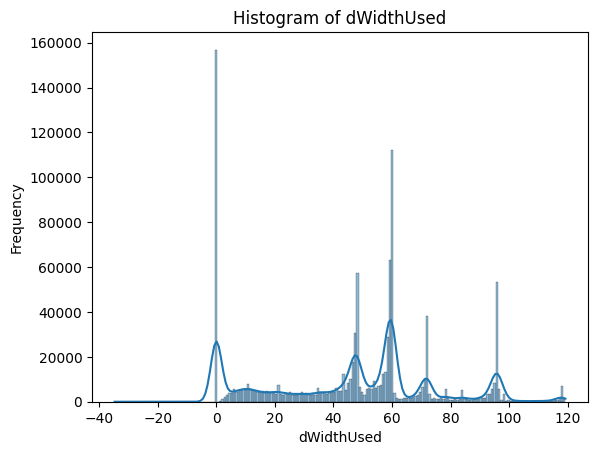

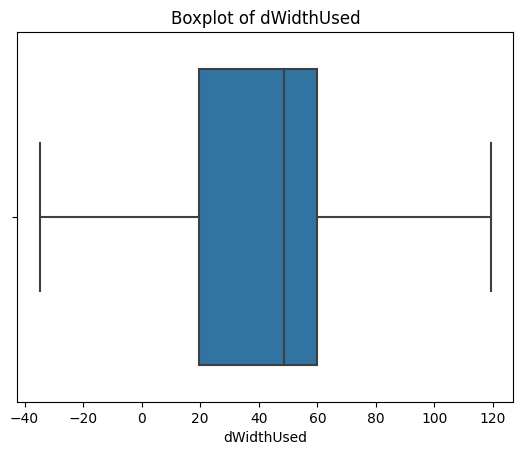

count    1.033739e+06
mean     4.600089e+01
std      2.992079e+01
min     -3.474350e+01
25%      1.970405e+01
50%      4.852300e+01
75%      5.999300e+01
max      1.192639e+02
Name: dWidthUsed, dtype: float64


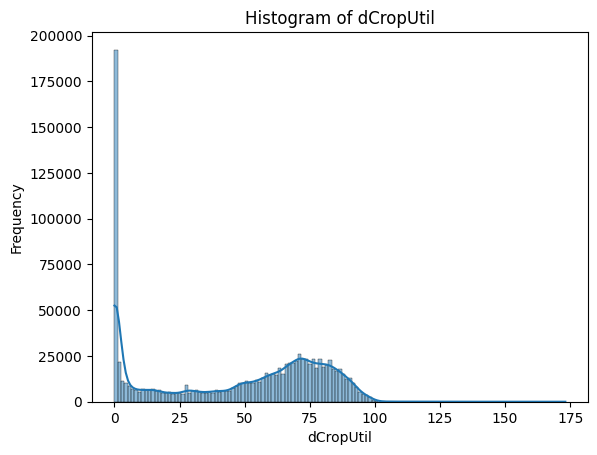

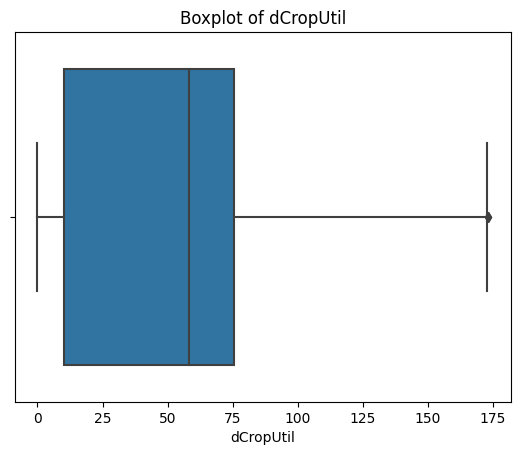

count    1.048168e+06
mean     4.761247e+01
std      3.266428e+01
min      0.000000e+00
25%      1.010667e+01
50%      5.816720e+01
75%      7.531650e+01
max      1.731576e+02
Name: dCropUtil, dtype: float64


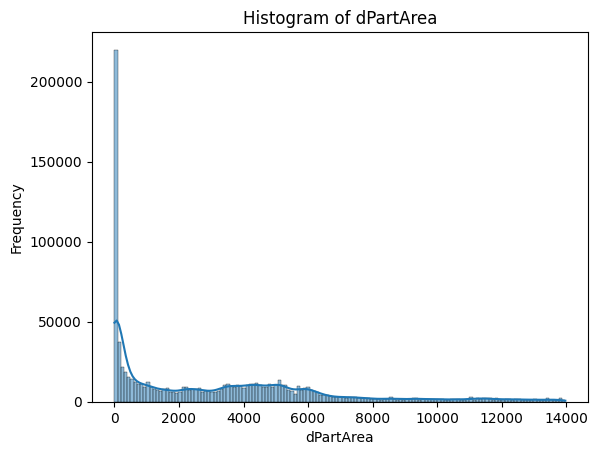

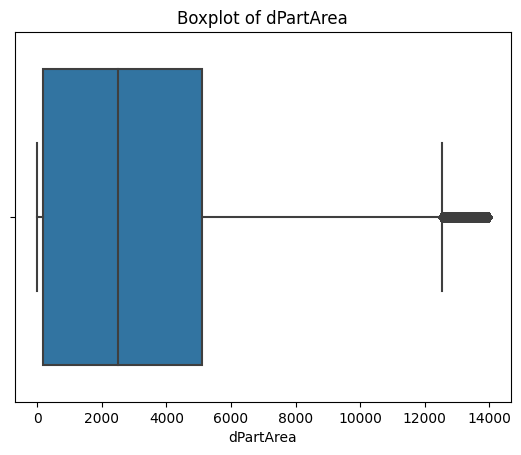

count    979483.000000
mean       3246.901711
std        3373.202525
min           0.000000
25%         157.999700
50%        2488.746800
75%        5113.220800
max       13974.810200
Name: dPartArea, dtype: float64


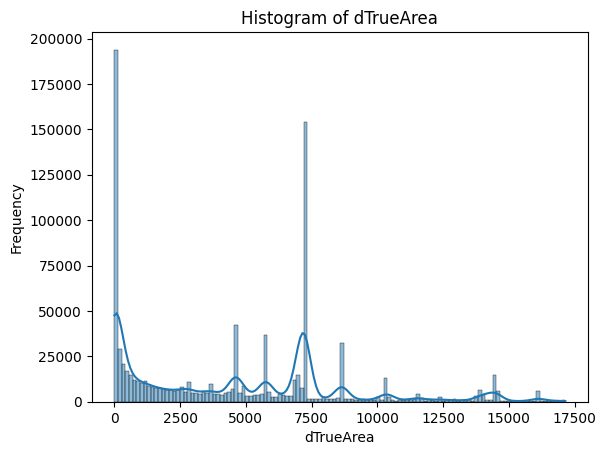

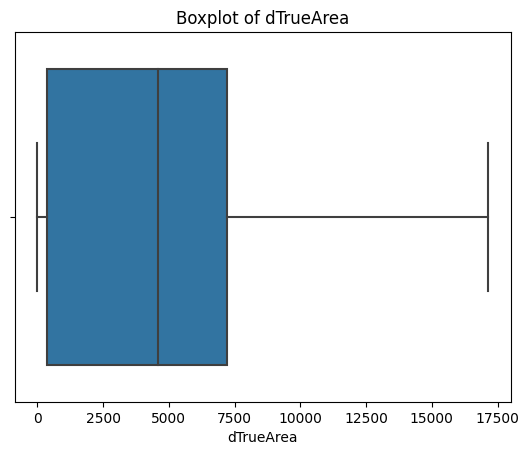

count    949204.000000
mean       4531.301640
std        4136.505313
min           0.000000
25%         365.959100
50%        4587.362100
75%        7200.000000
max       17148.899800
Name: dTrueArea, dtype: float64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data into a DataFrame
df = pd.read_csv('NestTable.csv')

# Define the list of variables to analyze
variables = df.columns.tolist()

# Remove the non-numeric variables
non_numeric = ['cBlock', 'cCycle', 'cPlot', 'cEntry', 'cTreatment', 'cRep']
variables = [var for var in variables if var not in non_numeric]

# Loop through each variable and plot a histogram and a boxplot
for var in variables:
    # Calculate the IQR and define the threshold values
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    threshold_low = Q1 - 1.5 * IQR
    threshold_high = Q3 + 1.5 * IQR

    # Create a new DataFrame with the outlier values removed
    df_no_outliers = df[(df[var] >= threshold_low) & (df[var] <= threshold_high)]

    # Plot a histogram of the variable
    sns.histplot(data=df_no_outliers, x=var, kde=True)
    plt.title('Histogram of {}'.format(var))
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

    # Plot a boxplot of the variable
    sns.boxplot(data=df_no_outliers, x=var)
    plt.title('Boxplot of {}'.format(var))
    plt.xlabel(var)
    plt.show()

    # Compute the summary statistics of the variable
    summary = df_no_outliers[var].describe()
    print(summary)
    
    #Comments 
    
    #Correlation matrix Nesting time and utilization anti correlatio and trade off between the two variables.
     #-Secondary 


In [ ]:
import pandas as pd

# Load the data into a DataFrame
df = pd.read_csv('NestTable.csv')

# Define the list of variables to clean
variables = df.columns.tolist()

# Loop through each variable and remove outliers using the IQR method
for var in variables:
    # Calculate the IQR and define the threshold values
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1
    threshold_low = Q1 - 1.5 * IQR
    threshold_high = Q3 + 1.5 * IQR

    # Remove the outliers from the variable
    df = df[(df[var] >= threshold_low) & (df[var] <= threshold_high)]

# Write the cleaned data to a new CSV file
df.to_csv('cleaned_data.csv', index=False)


count    2.446960e+05
mean     4.999140e+05
std      3.147843e+05
min      2.000000e+00
25%      2.088028e+05
50%      5.027080e+05
75%      7.759132e+05
max      1.048547e+06
Name: ixNest, dtype: float64
count    244696.000000
mean     201865.442247
std      128511.551563
min           2.000000
25%       81728.000000
50%      204067.000000
75%      316479.000000
max      421629.000000
Name: ixJobSummary, dtype: float64
count    244696.0
mean          1.0
std           0.0
min           1.0
25%           1.0
50%           1.0
75%           1.0
max           1.0
Name: cTimesCut, dtype: float64
count    244696.000000
mean          0.465157
std           0.498785
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: fOutput, dtype: float64
count    244696.000000
mean         23.485018
std          27.234019
min           1.000000
25%           4.000000
50%          12.000000
75%          34.000000
max         109.000000
Na

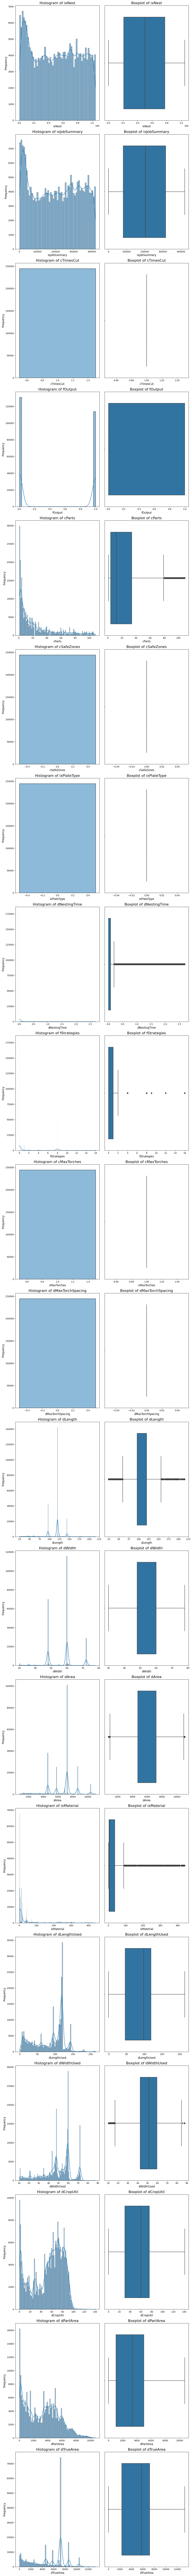

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned data into a DataFrame
df = pd.read_csv('cleaned_data.csv')

# Export the cleaned data to a CSV file
df.to_csv('cleaned_data_export.csv', index=False)

# Define the list of variables for univariate analysis
variables = df.columns.tolist()

# Set the figure size for the plots
fig, axes = plt.subplots(len(variables), 2, figsize=(12, 8 * len(variables)))

# Loop through each variable and perform univariate analysis
for i, var in enumerate(variables):
    # Plot a histogram of the variable
    sns.histplot(data=df, x=var, kde=True, ax=axes[i][0])
    axes[i][0].set_title('Histogram of {}'.format(var), fontsize=16)
    axes[i][0].set_xlabel(var, fontsize=12)
    axes[i][0].set_ylabel('Frequency', fontsize=12)

    # Plot a boxplot of the variable
    sns.boxplot(data=df, x=var, ax=axes[i][1])
    axes[i][1].set_title('Boxplot of {}'.format(var), fontsize=16)
    axes[i][1].set_xlabel(var, fontsize=12)

    # Set the font size of tick labels
    axes[i][0].tick_params(axis='both', labelsize=10)
    axes[i][1].tick_params(axis='both', labelsize=10)

    # Compute the summary statistics of the variable
    summary = df[var].describe()
    print(summary)

    # Export the plots as image files
    plt.savefig('{}_hist.png'.format(var))  # Histogram
    plt.savefig('{}_box.png'.format(var))   # Boxplot

# Adjust the spacing between subplots
plt.tight_layout()

# Export the entire figure as a PDF file
plt.savefig('univariate_analysis.pdf')

# Display the plots
plt.show()
